# HW 6 - Computational exploration of Phase Space

Return as *firstname_lastname-HW6.*
Specify your collaborators.


### Question 1 -  Categorizing the Phase Plane
Pick 2X2 real-valued matrices that satisfy the following 4 conditions.
* Det < 0
* Det > 0 & Trace > 0 & Real lambdas
* Det > 0 & Trace > 0 & Complex lambdas
* Det > 0 & Trace < 0 & Real lambdas
* Det > 0 & Trace < 0 & Complex lambdas
* Det > 0 & Trace = 0 & Imaginary lambdas

Plot the 2D phase portrait and eigenvectors (if they are real). Specify whether the fixed points are stable or unstable.

Conditions for Matrix 1 are True.
Conditions for Matrix 2 are True.
Conditions for Matrix 3 are True.
Conditions for Matrix 4 are True.
Conditions for Matrix 5 are True.
Conditions for Matrix 6 are True.
------------------------------------------------------------------------------
Conditional Matrix 1:
Fixed point at the origin is unstable (eval1 = 1.414213562373095).
Fixed point at the origin is stable (eval2 = -1.4142135623730951).


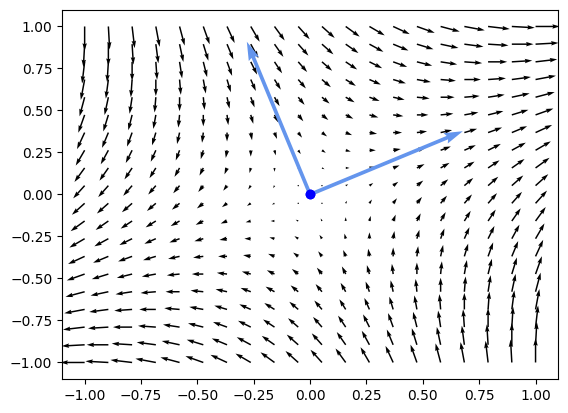

Conditional Matrix 2:
Fixed point at the origin is unstable (eval1 = 0.5857864376269051).
Fixed point at the origin is unstable (eval2 = 3.414213562373095).


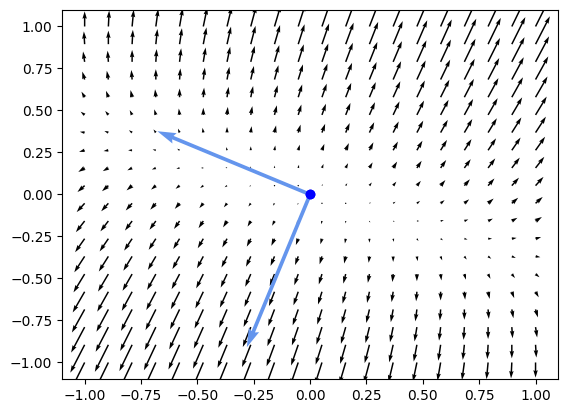

Conditional Matrix 3:
Purely imaginary eigenvalue (eval1 = (2+1j)).
Purely imaginary eigenvalue (eval2 = (2-1j)).


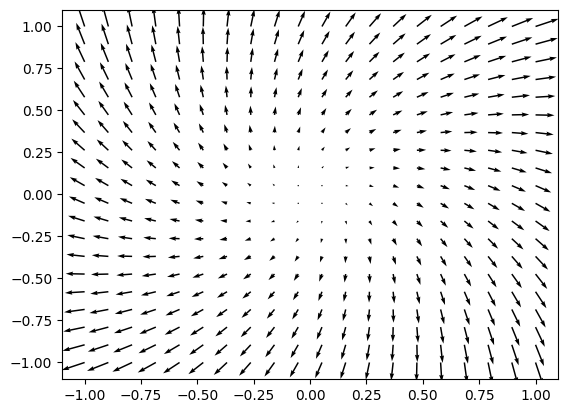

Conditional Matrix 4:
Fixed point at the origin is stable (eval1 = -0.2679491924311228).
Fixed point at the origin is stable (eval2 = -3.732050807568877).


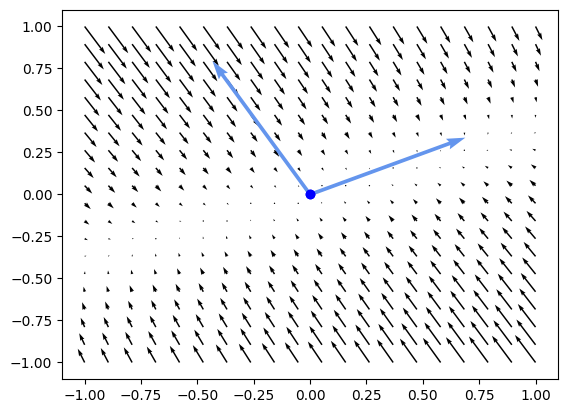

Conditional Matrix 5:
Purely imaginary eigenvalue (eval1 = (-1+1j)).
Purely imaginary eigenvalue (eval2 = (-1-1j)).


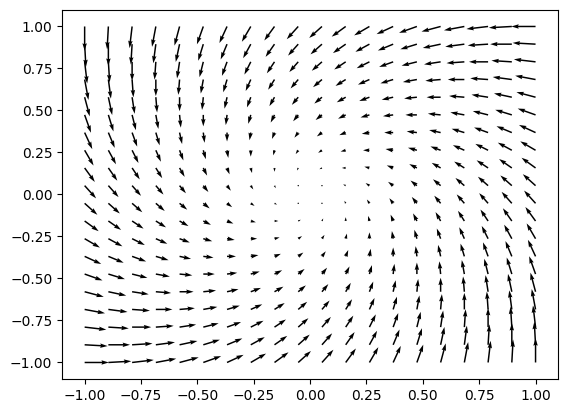

Conditional Matrix 6:
Purely imaginary eigenvalue (eval1 = 1j).
Purely imaginary eigenvalue (eval2 = -1j).


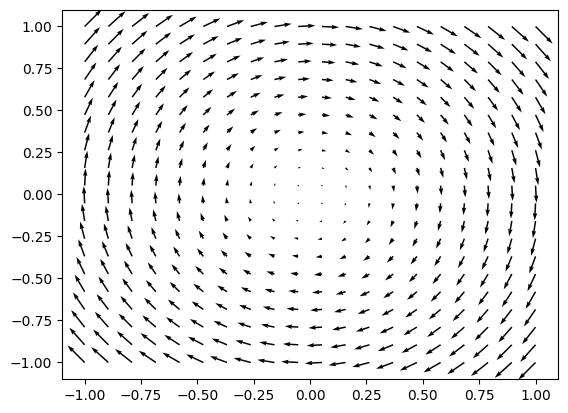

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# set matrices for each condition
c1 = np.array([[1, 1],[1, -1]])
c2 = np.array([[1, 1], [1, 3]])
c3 = np.array([[2, 1], [-1, 2]])
c4 = np.array([[-1, 2], [1, -3]])
c5 = np.array([[-1, -1], [1, -1]])
c6 = np.array([[0, 1], [-1, 0]])

# check to see if conditions are met
print(f'Conditions for Matrix 1 are {np.linalg.det(c1) < 0}.')
print(f'Conditions for Matrix 2 are {(np.linalg.det(c2) > 0) & (np.trace(c2) > 0) & (np.isreal(np.linalg.eig(c2)[0]).all())}.')
print(f'Conditions for Matrix 3 are {(np.linalg.det(c3) > 0) & (np.trace(c3) > 0) & (np.isreal(np.linalg.eig(c3)[0]).all() == False)}.')
print(f'Conditions for Matrix 4 are {(np.linalg.det(c4) > 0) & (np.trace(c4) < 0) & (np.isreal(np.linalg.eig(c4)[0]).all())}.')
print(f'Conditions for Matrix 5 are {(np.linalg.det(c5) > 0) & (np.trace(c5) < 0) & (np.isreal(np.linalg.eig(c5)[0]).all() == False)}.')
print(f'Conditions for Matrix 6 are {(np.linalg.det(c6) > 0) & (np.trace(c6) == 0) & (np.real(np.linalg.eig(c6)[0]).all() == 0)}.')

print('------------------------------------------------------------------------------')


def plot_pp(arr):
    # find eigenvalue and eigenvectors
    evals, evecs = np.linalg.eig(arr)

    # create meshgrid to evaluate derivative on
    x, y = np.meshgrid(np.linspace(-1, 1, 20), np.linspace(-1, 1, 20))
    xy = np.array([x.reshape(-1), y.reshape(-1)])

    # evaluate derivative on the meshgrid
    dx, dy = np.dot(arr, xy).reshape(2, 20, 20)

    # plot phase portrait
    plt.quiver(x, y, dx, dy)

    # plot eigenvectors
    if np.isreal(evals).all() == True:
        for i in range(len(evecs)):
            vecs = evecs[:, i]
            if np.isreal(vecs).all():
                plt.quiver(0, 0, vecs[0], vecs[1], scale = 3, color = 'cornflowerblue')
            else:
                plt.plot([0, vecs[0]], [0, vecs[1]])
                plt.plot([0, -vecs[0]], [0, -vecs[1]])

    # plot fixed points
    for i in range(len(evals)):
        if np.isreal(evals[i]):
            if evals[i] > 0:
                plt.plot(0, 0, 'bo')
                print(f'Fixed point at the origin is unstable (eval{i+1} = {evals[i]}).')
            else:
                plt.plot(0, 0, 'bo')
                print(f'Fixed point at the origin is stable (eval{i+1} = {evals[i]}).')
        else:
            print(f'Purely imaginary eigenvalue (eval{i+1} = {evals[i]}).')
    
    plt.show()

# call plot_pp to plot phase portrait and eigenvectors for each matrix
print('Conditional Matrix 1:')
plot_pp(c1)

print('Conditional Matrix 2:')
plot_pp(c2)

print('Conditional Matrix 3:')
plot_pp(c3)

print('Conditional Matrix 4:')
plot_pp(c4)

print('Conditional Matrix 5:')
plot_pp(c5)

print('Conditional Matrix 6:')
plot_pp(c6)

## Question 2 - Multiple Equillibria in 2D

Consider a model where Sharks eat Tuna causing Tuna populations to diminish and Shark populations to increase. 

$$\dot{S} = 0.01ST - 0.2S$$
$$\dot{T} = 0.05T - 0.01ST$$

Plot this phase plane.
How many equilibrium points are there, what are their coordinates?
What is each one's biological significance?



ValueError: Argument U has a size 380 which does not match 400, the number of arrow positions

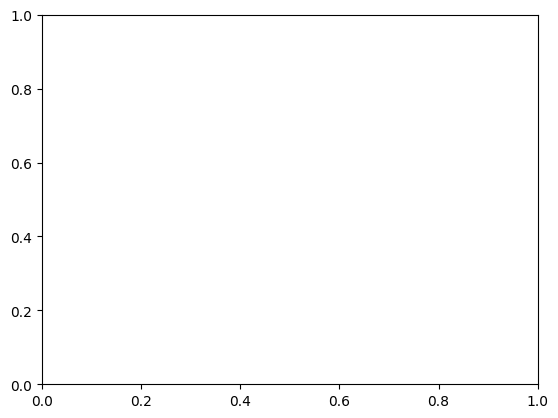

In [35]:
import scipy.integrate as sci
import scipy.optimize as spo                

def sharks_eat_tuna(x, t):
    # unpack variables, write ODEs
    S, T = x
    dSdt = 0.01*S*T - 0.2*S
    dTdt = 0.05*T - 0.01*S*T
    return np.array([dSdt, dTdt])

# calculate the derivative at any given point
def deriv(point):
    return sharks_eat_tuna(point, 0)

# set grid for phase plane
S, T = np.meshgrid(np.linspace(0, 50, 20), np.linspace(0, 50, 20))


# calculate speed and direction of vectors
S_mag, T_mag = sharks_eat_tuna([S, T], 0)
speed = np.sqrt(S_mag**2 + T_mag**2)


# plot the vector field, omitting the first column as normalizing magnitudes would divide by zero
plt.quiver(S[:,1:], T[:,1:], S_mag[:,1:]/speed[:,1:], T_mag[:,1:]/speed[:,1:], speed[:,1:], cmap='viridis')


# find the equilibrium points
equilib_points = []
for i in range(S.shape[0]):
    for j in range(S.shape[1]):
        point = spo.fsolve(deriv, [S[i,j], T[i,j]])
        if np.all(point >= 0):
            equilib_points.append(point)

# plot the equilibrium points
for point in equilib_points:
    plt.plot(point[0], point[1], 'o', c = '#20A387FF')

print(f'The equilibrium points, at (0, 0) and (5, 20), represent the population levels (e.g. sharks = 5 and tuna = 20) at which eqquilibrium will be reached. That is, the neither population will be driven to extinction at the given predation rate.')

# set axis limits
plt.xlim([0, 50])
plt.ylim([0, 50])
plt.xlabel('Sharks')
plt.ylabel('Tuna')
plt.show()

## Extra Credit - 3D Phase Fields

Plot the 3D phase field of the equation from -2:2 in all dimensions

$$\dot{x} = -z$$
$$\dot{y} = -x$$
$$\dot{z} = y$$

Plot 10 trajectories through the phase field. 

Consider the following block of code as an example of how to plot 3D vector fields. 


Populating the interactive namespace from numpy and matplotlib


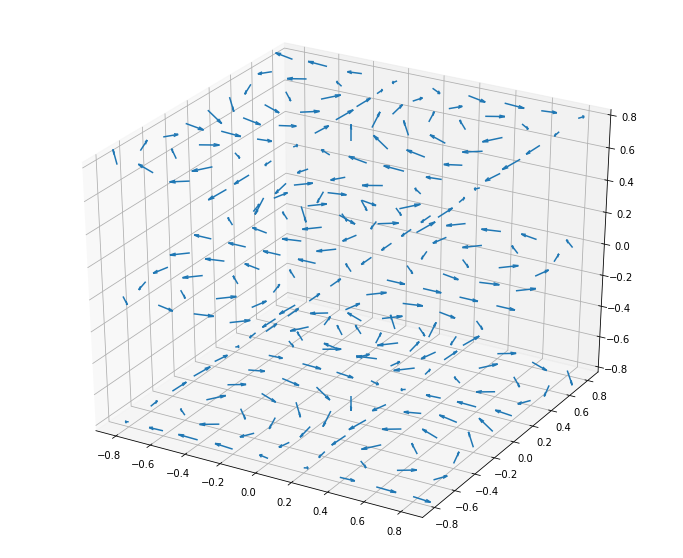

In [9]:
%pylab inline
pylab.rcParams['figure.figsize'] = (12.0,10.0)
from mpl_toolkits.mplot3d import Axes3D 

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make the grid
x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.8))

# Make the direction data for the arrows
u = np.sin(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z)
v = -np.cos(np.pi * x) * np.sin(np.pi * y) * np.cos(np.pi * z)
w = (np.sqrt(2.0 / 3.0) * np.cos(np.pi * x) * np.cos(np.pi * y) *
     np.sin(np.pi * z))

ax.quiver(x, y, z, u, v, w, length=0.1, normalize=True) #They upgraded a normalize argument into quiver so no more normalization needed

plt.show()

In [ ]:
#